# Loader Utility
The dataset dynamically changes, so to stay always up-to-date, we are using the Python Requests package.

Also, we are using Git to synchronize our progress easily, so saving and tracking the dataset would be unnecessary.

In [1]:
from python.defs import get_path
from python.utils.loader import Loader

In [2]:
file_path = get_path()
Loader.send_get_request(file_path)

---
# Reader utility
Here we create reader instance to encapsulate dataset operating logic

In [3]:
from python.utils.csv_reader import CSV_Reader
reader = CSV_Reader(file_path, 'nba.csv')

Some functionality example:

In [4]:
reader.get_dataset_head().T

,0,1,2,3,4
gameorder,1,1,2,2,3
game_id,194611010TRH,194611010TRH,194611020CHS,194611020CHS,194611020DTF
lg_id,NBA,NBA,NBA,NBA,NBA
_iscopy,0,1,0,1,0
year_id,1947,1947,1947,1947,1947
date_game,11/1/1946,11/1/1946,11/2/1946,11/2/1946,11/2/1946
seasongame,1,1,1,2,1
is_playoffs,0,0,0,0,0
team_id,TRH,NYK,CHS,NYK,DTF
fran_id,Huskies,Knicks,Stags,Knicks,Falcons


In [5]:
reader.get_types()

gameorder          int64
game_id           object
lg_id             object
_iscopy            int64
year_id            int64
date_game         object
seasongame         int64
is_playoffs        int64
team_id           object
fran_id           object
pts                int64
elo_i            float64
elo_n            float64
win_equiv        float64
opp_id            object
opp_fran          object
opp_pts            int64
opp_elo_i        float64
opp_elo_n        float64
game_location     object
game_result       object
forecast         float64
notes             object
dtype: object

In [6]:
reader.get_dataset_statistic()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [7]:
reader.get_column_values("date_game")

date_game
1/2/2009      30
4/13/2011     30
4/17/2013     30
4/16/2014     30
10/31/1997    28
              ..
3/26/2015      2
6/1/2005       2
6/2/2005       2
6/4/2005       2
6/6/2005       2
Name: count, Length: 12426, dtype: int64

In [8]:
reader.get_column_values("team_id")

team_id
BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
TRH      60
DTF      60
PIT      60
INJ      60
SDS      11
Name: count, Length: 104, dtype: int64

In [9]:
reader.get_nulls_count()

120890

In [10]:
reader.get_nulls_count_in_column("notes")

120890

In [11]:
reader.get_nulls_count_in_column("team_id")

0

Lets delete unused and null/nan colums:

In [12]:
reader.delete_column("notes")
reader.get_dataset_head().T

,0,1,2,3,4
gameorder,1,1,2,2,3
game_id,194611010TRH,194611010TRH,194611020CHS,194611020CHS,194611020DTF
lg_id,NBA,NBA,NBA,NBA,NBA
_iscopy,0,1,0,1,0
year_id,1947,1947,1947,1947,1947
date_game,11/1/1946,11/1/1946,11/2/1946,11/2/1946,11/2/1946
seasongame,1,1,1,2,1
is_playoffs,0,0,0,0,0
team_id,TRH,NYK,CHS,NYK,DTF
fran_id,Huskies,Knicks,Stags,Knicks,Falcons


Rename some columns to clarify their purpose

In [13]:
reader.rename_column("seasongame", "season_game")
reader.rename_column("pts", "points")
reader.rename_column("_iscopy", "is_copy")
reader.rename_column("lg_id", "league_id")
reader.rename_column("fran_id", "franchise_id")
reader.get_dataset_head()

,gameorder,game_id,league_id,is_copy,year_id,date_game,season_game,is_playoffs,team_id,franchise_id,points,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64


And lets add some other cleaning and data preparation methods:

In [14]:
reader.change_data_type("is_copy", "bool")
reader.get_types()

gameorder          int64
game_id           object
league_id         object
is_copy             bool
year_id            int64
date_game         object
season_game        int64
is_playoffs        int64
team_id           object
franchise_id      object
points             int64
elo_i            float64
elo_n            float64
win_equiv        float64
opp_id            object
opp_fran          object
opp_pts            int64
opp_elo_i        float64
opp_elo_n        float64
game_location     object
game_result       object
forecast         float64
dtype: object

In [15]:
old_shape = reader.get_table_shape()
reader.delete_duplicates()

if old_shape == reader.get_table_shape():
	print(f"There are no duplicates in the table")
else:
	print(f"Duplicates successfully deleted")
print("Old shape:", old_shape)
print("Current shape:", reader.get_table_shape())

There are no duplicates in the table
Old shape: (126314, 22)
Current shape: (126314, 22)


In [16]:
reader.check_for_outliers_in_column("points")

,gameorder,year_id,season_game,is_playoffs,points,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
2,2,1947,1,0,63,1300.00,1309.65,42.01,47,1306.72,1297.07,0.63
3,2,1947,2,0,47,1306.72,1297.07,40.69,63,1300.00,1309.65,0.37
4,3,1947,1,0,33,1300.00,1279.62,38.86,50,1300.00,1320.38,0.64
5,3,1947,1,0,50,1300.00,1320.38,43.14,33,1300.00,1279.62,0.36
6,4,1947,1,0,53,1300.00,1294.85,40.46,59,1300.00,1305.15,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...
123209,61605,2014,71,0,143,1538.36,1545.36,45.28,107,1364.06,1357.06,0.83
123367,61684,2014,77,0,145,1648.75,1654.60,56.02,130,1358.47,1352.61,0.75
123633,61817,2014,90,1,63,1582.63,1554.07,46.18,85,1524.91,1553.47,0.71
126046,63024,2015,79,0,143,1421.32,1417.74,32.04,144,1552.63,1556.22,0.46


In [17]:
reader.delete_outliers('points')
reader.get_dataset_head()

,gameorder,game_id,league_id,is_copy,year_id,date_game,season_game,is_playoffs,team_id,franchise_id,points,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,False,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64
1,1,194611010TRH,NBA,True,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36
2,2,194611020CHS,NBA,False,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63
3,2,194611020CHS,NBA,True,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37
4,3,194611020DTF,NBA,False,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64


Finaly, lets save proceeded data to file

In [18]:
reader.save_to_file('cleaned_dataset.csv')

In [19]:
reader = CSV_Reader(file_path, 'cleaned_dataset.csv')
reader.get_dataset_head()

,gameorder,game_id,league_id,is_copy,year_id,date_game,season_game,is_playoffs,team_id,franchise_id,points,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,False,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64
1,1,194611010TRH,NBA,True,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36
2,2,194611020CHS,NBA,False,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63
3,2,194611020CHS,NBA,True,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37
4,3,194611020DTF,NBA,False,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64


---
# Data visualization

After data proceeding, lets see how it looks

<Axes: xlabel='franchise_id'>

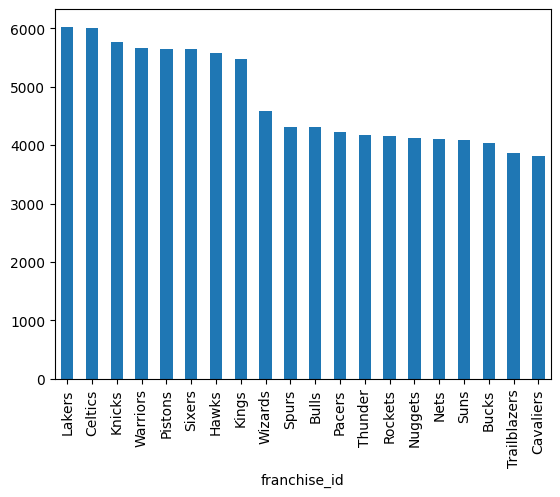

In [20]:
nba = reader.get_dataset()
nba["franchise_id"].value_counts().head(20).plot(kind="bar")

<Axes: xlabel='year_id'>

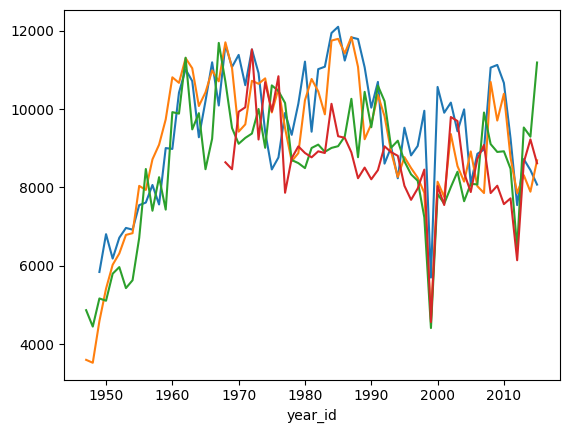

In [21]:
nba[nba["franchise_id"] == "Lakers"].groupby("year_id")["points"].sum().plot() # blue
nba[nba["franchise_id"] == "Celtics"].groupby("year_id")["points"].sum().plot() # orange
nba[nba["franchise_id"] == "Warriors"].groupby("year_id")["points"].sum().plot() # green
nba[nba["franchise_id"] == "Nets"].groupby("year_id")["points"].sum().plot() # red

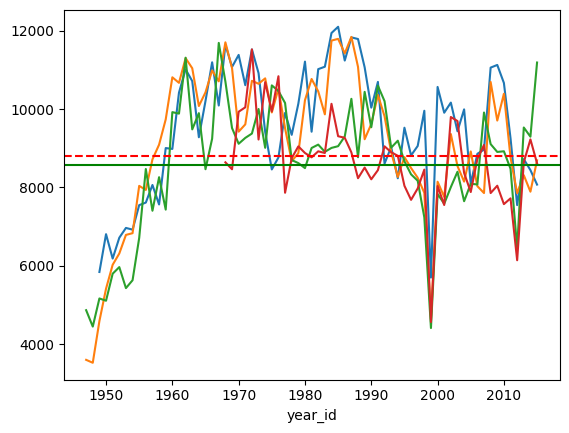

In [22]:
import matplotlib.pyplot as plt

nba[nba["franchise_id"] == "Lakers"].groupby("year_id")["points"].sum().plot()
nba[nba["franchise_id"] == "Celtics"].groupby("year_id")["points"].sum().plot()
nba[nba["franchise_id"] == "Warriors"].groupby("year_id")["points"].sum().plot()
nba[nba["franchise_id"] == "Nets"].groupby("year_id")["points"].sum().plot()

all_teams_data = nba.groupby(["year_id", "franchise_id"])["points"].sum().unstack()
mean_points = all_teams_data.mean(axis=1)
median_points = all_teams_data.median(axis=1)

plt.axhline(median_points.median(), color='red', linestyle='--')
plt.axhline(mean_points.mean(), color='green', linestyle='-')

Text(0.5, 1.0, 'Nets Game Result')

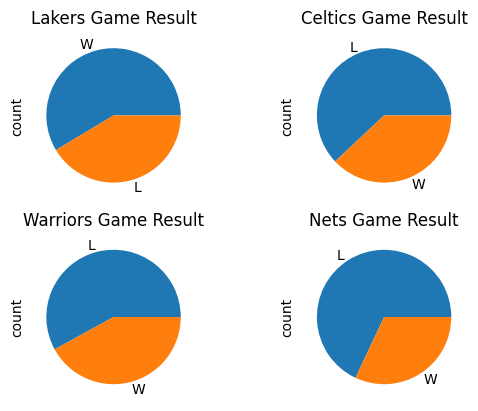

In [23]:
import matplotlib.pyplot as plt

year_id = 1999

lakers_data = nba[(nba["franchise_id"] == "Lakers") & (nba["year_id"] == year_id)]
celtics_data = nba[(nba["franchise_id"] == "Celtics") & (nba["year_id"] == year_id)]
warriors_data = nba[(nba["franchise_id"] == "Warriors") & (nba["year_id"] == year_id)]
nets_data = nba[(nba["franchise_id"] == "Nets") & (nba["year_id"] == year_id)]

plt.subplot(2, 2, 1)
lakers_data["game_result"].value_counts().plot(kind="pie")
plt.title("Lakers Game Result")

plt.subplot(2, 2, 2)
celtics_data["game_result"].value_counts().plot(kind="pie")
plt.title("Celtics Game Result")

plt.subplot(2, 2, 3)
warriors_data["game_result"].value_counts().plot(kind="pie")
plt.title("Warriors Game Result")

plt.subplot(2, 2, 4)
nets_data["game_result"].value_counts().plot(kind="pie")
plt.title("Nets Game Result")

Now lets use seaborn lib to create other graphics

<Axes: xlabel='game_result', ylabel='game_location'>

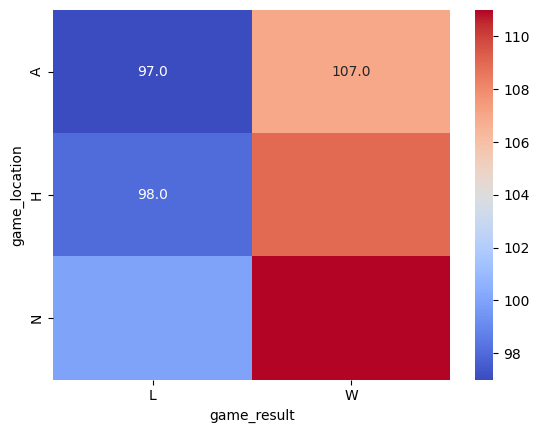

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = nba.pivot_table(index='game_location', columns='game_result', values='points', aggfunc='median')

sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")

/home/zhenia/MyFiles/python/IDA_Lab1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhenia/MyFiles/python/IDA_Lab1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhenia/MyFiles/python/IDA_Lab1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhenia/MyFiles/python/IDA_Lab1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

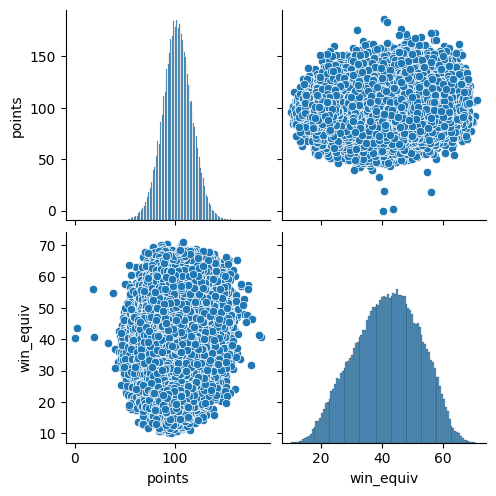

In [25]:
columns_to_include = [
    'points', 'win_equiv'
]

subset_df = nba[columns_to_include]

sns.pairplot(subset_df, diag_kind='hist', markers='o')

/home/zhenia/MyFiles/python/IDA_Lab1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhenia/MyFiles/python/IDA_Lab1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhenia/MyFiles/python/IDA_Lab1/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Boxplot of Points by Franchise')

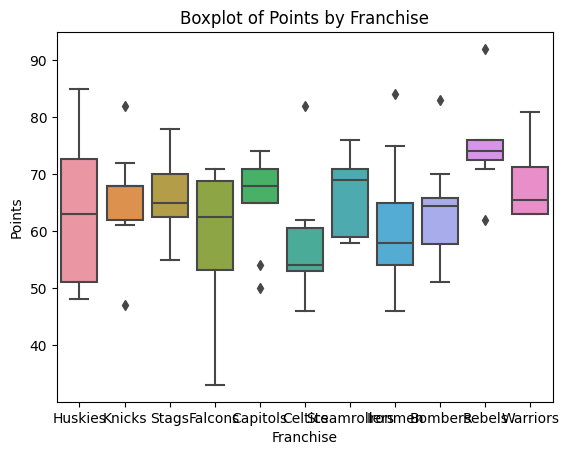

In [26]:
sns.boxplot(x='franchise_id', y='points', data = nba.head(100))

plt.xlabel('Franchise')
plt.ylabel('Points')
plt.title('Boxplot of Points by Franchise')